In [20]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import Variable as V
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dataset = dsets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)

0it [00:00, ?it/s]

100%|█████████▉| 9879552/9912422 [00:15<00:00, 1025796.52it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 75161.99it/s]
32768it [00:00, 42066.40it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz



 90%|████████▉ | 1482752/1648877 [00:01<00:00, 1268421.98it/s]
1654784it [00:01, 927499.27it/s]                              
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz



  0%|          | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 15896.72it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


9920512it [00:29, 1025796.52it/s]                             

In [3]:
len(train_dataset)

60000

In [4]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
type(train_dataset[0])

tuple

In [7]:
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [8]:
train_dataset[0][1]

5

In [10]:
img = train_dataset[0][0].numpy().reshape(28, 28)

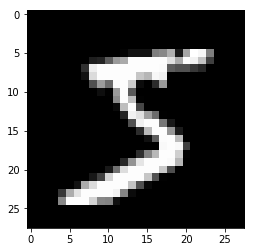

In [11]:
plt.imshow(img, cmap='gray')

In [13]:
test_dataset = dsets.MNIST(root='./data', train = False, transform = transforms.ToTensor())

In [14]:
len(test_dataset)

10000

In [15]:
batch_size = 100

In [16]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

In [18]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [22]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [23]:
input_dim = 28*28
output_dim = 10

model = LogisticRegression(input_dim, output_dim)

In [24]:
criterion = nn.CrossEntropyLoss()

In [25]:
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = lr) 

In [28]:
epochs = 5
it = 0
for e in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = V(images.view(-1,28*28))
        labels = V(labels)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        it += 1
        
        if it%500 == 0:
            correct = 0
            total = 0
            
            for images, labels in test_loader:
                images = V(images.view(-1, 28*28))
                outputs = model(images)
                _,predicted = torch.max(outputs.data, 1)
                total+= labels.size(0)
                
                correct += (predicted == labels).sum()
            accuracy = 100 * correct/total
            
            print('iteration: {}, loss: {}, accuracy: {}'.format(it, loss.data, accuracy))

iteration: 500, loss: 0.4261389970779419, accuracy: 89
iteration: 1000, loss: 0.32171371579170227, accuracy: 90
iteration: 1500, loss: 0.24312596023082733, accuracy: 90
iteration: 2000, loss: 0.3178716003894806, accuracy: 90
iteration: 2500, loss: 0.36050277948379517, accuracy: 90
iteration: 3000, loss: 0.36088380217552185, accuracy: 90


In [38]:
it = 0
for images, labels in test_loader:
    it+=1
    images = V(images.view(-1, 28*28))
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if it == 1:
        print(predicted[0], labels[0])

tensor(7) tensor(7)
